# Exploratory Data Analysis for a Washington State Data Breach Database

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import dataframe_image as dfi

In [12]:
# formatting for pandas to display the numbers pulled from the dataframe differently (keeps it from doing scientific notation)
pd.options.display.float_format = '{:.0f}'.format

In [13]:
wa_databreach_df = pd.read_csv("../data/wa_state_data_breaches.csv")
wa_databreach_df.head()

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
0,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Delta Airlines,9561,Malware,24563,Business,...,100-199,0,183,183,False,16,167,False,14,1-99
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,"Best Buy Co, Inc.",9562,Malware,8390,Business,...,100-199,0,183,183,False,16,167,False,16,1-99
2,03/14/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Unauthorized Access,NaN,NaN,Inogen Inc.,9563,NaN,518,Health,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,30,Unknown
3,03/15/2018 12:00:00 AM,04/24/2018 12:00:00 AM,Cyberattack,09/27/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Sears Holdings,9565,Malware,2373,Business,...,100-199,0,169,169,False,15,154,False,40,1-99
4,03/29/2018 12:00:00 AM,04/26/2018 12:00:00 AM,Cyberattack,07/01/2017 12:00:00 AM,03/31/2018 12:00:00 AM,Hudson's Bay Company,9566,Malware,NaN,Business,...,200-299,2,271,273,True,273,NaN,False,28,200-299


In [14]:
wa_databreach_df.shape

(967, 24)

In [15]:
describe_table = wa_databreach_df.describe()

describe_table

,Id,WashingtoniansAffected,Year,YearText,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,DaysElapsedBeforeNotification
count,967,935,967,967,764,819,746,763,387,943
mean,11560,26715,2021,2021,6,142,147,112,77,85
std,1984,159391,2,2,26,296,269,225,206,91
min,9561,15,2016,2016,0,-281,0,0,1,0
25%,10264,843,2019,2019,0,4,7,2,13,30
50%,10533,1687,2021,2021,0,40,54,34,57,51
75%,13472,6217,2022,2022,0,160,178,103,80,106
max,15726,3243664,2024,2024,365,3728,3728,2240,3453,638


In [16]:
dfi.export(describe_table, '../images/describetable.png')

In [17]:
wa_databreach_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DateAware                          943 non-null    object 
 1   DateSubmitted                      967 non-null    object 
 2   DataBreachCause                    967 non-null    object 
 3   DateStart                          839 non-null    object 
 4   DateEnd                            781 non-null    object 
 5   Name                               967 non-null    object 
 6   Id                                 967 non-null    int64  
 7   CyberattackType                    627 non-null    object 
 8   WashingtoniansAffected             935 non-null    float64
 9   IndustryType                       967 non-null    object 
 10  BusinessType                       458 non-null    object 
 11  Year                               967 non-null    int64  

In [18]:
wa_databreach_df.columns.values

array(['DateAware', 'DateSubmitted', 'DataBreachCause', 'DateStart',
       'DateEnd', 'Name', 'Id', 'CyberattackType',
       'WashingtoniansAffected', 'IndustryType', 'BusinessType', 'Year',
       'YearText', 'WashingtoniansAffectedRange', 'BreachLifecycleRange',
       'DaysToContainBreach', 'DaysToIdentifyBreach',
       'DaysBreachLifecycle', 'DiscoveredInProgress', 'DaysOfExposure',
       'DaysElapsedBetweenEndAndDiscovery', 'EndedOnDayDiscovered',
       'DaysElapsedBeforeNotification', 'DaysOfExposureRange'],
      dtype=object)

In [19]:
wa_databreach_df['CyberattackType'].unique()

array(['Malware', nan, 'Phishing', 'Skimmers', 'Ransomware', 'Other',
       'Unclear/unknown'], dtype=object)

In [20]:
wa_databreach_df['CyberattackType'].value_counts()

Ransomware         282
Malware            185
Phishing            72
Other               64
Skimmers            13
Unclear/unknown     11
Name: CyberattackType, dtype: int64

In [21]:
wa_databreach_df['DataBreachCause'].unique()

array(['Cyberattack', 'Unauthorized Access', 'Theft or Mistake'],
      dtype=object)

In [22]:
wa_databreach_df['DataBreachCause'].value_counts()

Cyberattack            684
Unauthorized Access    212
Theft or Mistake        71
Name: DataBreachCause, dtype: int64

In [23]:
wa_databreach_df.loc[: , ['DataBreachCause', 'CyberattackType']].sample(5)

,DataBreachCause,CyberattackType
42,Unauthorized Access,NaN
255,Cyberattack,Malware
858,Cyberattack,Ransomware
808,Cyberattack,Ransomware
966,Unauthorized Access,NaN


Need to come back and change cyberattack, NaN to it's own category of unreported.

should be something like: 
```python
wa_databreach_df[[Cyberattack, NaN]] = wa_databreach_df[[Cyberattack, Unreported]]
```

In [24]:
# making the change to cyberattack DataBreachCause that are null in CyberattackType
wa_databreach_df.loc[:, 'CyberattackType'][(wa_databreach_df['DataBreachCause'] == 'Cyberattack') & (wa_databreach_df['CyberattackType'].isnull())] = 'Unreported'

wa_databreach_df.sample(10)

C:\Users\isaac\AppData\Local\Temp\ipykernel_97420\2967485352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_databreach_df.loc[:, 'CyberattackType'][(wa_databreach_df['DataBreachCause'] == 'Cyberattack') & (wa_databreach_df['CyberattackType'].isnull())] = 'Unreported'


,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
165,11/30/2017 12:00:00 AM,01/25/2018 12:00:00 AM,Theft or Mistake,11/30/2017 12:00:00 AM,11/30/2017 12:00:00 AM,Zachary E. Adkins DDS,9764,NaN,NaN,Health,...,0,0,0,0,True,0,NaN,True,56,0
345,12/02/2020 12:00:00 AM,12/28/2020 12:00:00 AM,Theft or Mistake,11/30/2020 12:00:00 AM,NaN,Prime Therapeutics,10378,NaN,897,Health,...,Unknown,NaN,2,NaN,False,NaN,NaN,False,26,Unknown
526,10/09/2018 12:00:00 AM,11/05/2018 12:00:00 AM,Theft or Mistake,10/09/2018 12:00:00 AM,10/09/2018 12:00:00 AM,Nordstrom Inc.,10587,NaN,13442,Business,...,0,0,0,0,True,0,NaN,True,27,0
724,06/28/2022 12:00:00 AM,07/22/2022 12:00:00 AM,Theft or Mistake,06/24/2022 12:00:00 AM,06/24/2022 12:00:00 AM,Sound Health & Wellness Trust c/o Zenith Ameri...,13593,NaN,36994,Health,...,1-99,0,4,4,False,0,4,False,24,0
751,03/20/2023 12:00:00 AM,08/29/2023 12:00:00 AM,Cyberattack,01/05/2023 12:00:00 AM,03/21/2023 12:00:00 AM,F21 OpcO LLC (d/b/a Forever 21),15600,Ransomware,9759,Business,...,1-99,1,74,75,True,75,NaN,False,162,1-99
138,06/26/2017 12:00:00 AM,08/14/2017 12:00:00 AM,Cyberattack,NaN,NaN,TRUEbenefits LLC,9732,Phishing,12327,Business,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,49,Unknown
612,06/14/2021 12:00:00 AM,10/11/2021 12:00:00 AM,Cyberattack,06/14/2021 12:00:00 AM,06/15/2021 12:00:00 AM,University Medical Center of Southern Nevada (...,11113,Unclear/unknown,3572,Health,...,1-99,1,0,1,True,1,NaN,False,119,1-99
939,06/26/2022 12:00:00 AM,07/28/2022 12:00:00 AM,Cyberattack,NaN,NaN,Whatcom County Library System,13649,Ransomware,630,Government,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,32,Unknown
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,"Best Buy Co, Inc.",9562,Malware,8390,Business,...,100-199,0,183,183,False,16,167,False,16,1-99
253,08/18/2020 12:00:00 AM,09/15/2020 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,American Heart Association,10277,Ransomware,7658,Non-Profit/Charity,...,100-199,0,193,193,False,103,90,False,28,100-199


Need to make a function that changes all date columns to a simple year/month/day, since time is all the same and therefore arbitrary in this case.

In [25]:
# More db refining

# wa_databreach_df = wa_databreach_df.drop(['Id', 'YearText', 'Year','WashingtoniansAffectedRange'],axis=1)

# Test changing data column to datetime.date with 'DateStart
wa_databreach_df['DateStart'] = pd.to_datetime(wa_databreach_df['DateStart']).dt.date
wa_databreach_df

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
0,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,2017-09-26,10/12/2017 12:00:00 AM,Delta Airlines,9561,Malware,24563,Business,...,100-199,0,183,183,False,16,167,False,14,1-99
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,2017-09-26,10/12/2017 12:00:00 AM,"Best Buy Co, Inc.",9562,Malware,8390,Business,...,100-199,0,183,183,False,16,167,False,16,1-99
2,03/14/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Unauthorized Access,NaT,NaN,Inogen Inc.,9563,NaN,518,Health,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,30,Unknown
3,03/15/2018 12:00:00 AM,04/24/2018 12:00:00 AM,Cyberattack,2017-09-27,10/12/2017 12:00:00 AM,Sears Holdings,9565,Malware,2373,Business,...,100-199,0,169,169,False,15,154,False,40,1-99
4,03/29/2018 12:00:00 AM,04/26/2018 12:00:00 AM,Cyberattack,2017-07-01,03/31/2018 12:00:00 AM,Hudson's Bay Company,9566,Malware,NaN,Business,...,200-299,2,271,273,True,273,NaN,False,28,200-299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,03/26/2022 12:00:00 AM,05/25/2022 12:00:00 AM,Unauthorized Access,2022-03-25,03/26/2022 12:00:00 AM,Fred Hutchinson Cancer Center,13445,NaN,78834,Health,...,1-99,0,1,1,True,1,NaN,True,60,1-99
963,04/25/2022 12:00:00 AM,05/25/2022 12:00:00 AM,Cyberattack,2022-03-26,04/01/2022 12:00:00 AM,"Elephant Insurance Services, LLC",13444,Other,937,Business,...,1-99,0,30,30,False,6,24,False,30,1-99
964,12/31/2021 12:00:00 AM,04/08/2022 12:00:00 AM,Unauthorized Access,2021-12-28,12/30/2021 12:00:00 AM,EMC National Life Company,13407,NaN,2666,Finance,...,1-99,0,3,3,False,2,1,False,98,1-99
965,08/01/2023 12:00:00 AM,08/31/2023 12:00:00 AM,Cyberattack,2023-08-01,08/01/2023 12:00:00 AM,Topgolf Callaway Brands Corp.,15726,Ransomware,14048,Business,...,0,0,0,0,True,0,NaN,True,30,0


In [26]:
# Filter for non-NaN values in Washingtonians affected and make a histplot for distribution

nonanmask = wa_databreach_df['WashingtoniansAffected'].notnull()
affected_only = wa_databreach_df[nonanmask]['WashingtoniansAffected']
affected_only = affected_only.sort_values()
print(affected_only.to_string())

32         15
257       500
21        500
114       501
444       502
351       505
335       505
727       505
474       506
406       507
423       511
55        511
73        512
115       513
153       515
298       516
524       516
466       516
807       517
815       518
795       518
470       518
958       518
2         518
521       519
935       519
921       521
691       521
357       522
136       523
374       523
97        524
103       526
196       526
192       527
739       531
702       531
614       532
483       532
516       533
359       534
855       534
887       535
441       536
299       537
381       540
502       540
117       541
742       541
764       542
40        544
885       545
936       545
821       546
228       548
69        549
902       549
327       552
713       554
308       555
71        556
84        558
849       559
380       560
845       561
830       563
264       564
574       566
38        566
645       568
311       569
841   

In [27]:
plot_affectedonly = affected_only[(affected_only < 10000) & (affected_only > 15)]
plot_affectedonly

257    500
21     500
114    501
444    502
351    505
      ... 
743   9606
80    9700
344   9721
751   9759
355   9898
Name: WashingtoniansAffected, Length: 756, dtype: float64

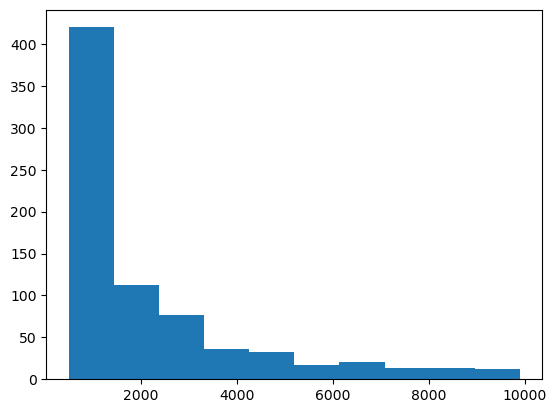

In [28]:
fig, ax = plt.subplots()

ax.hist(plot_affectedonly)
ax.ticklabel_format(style='plain')

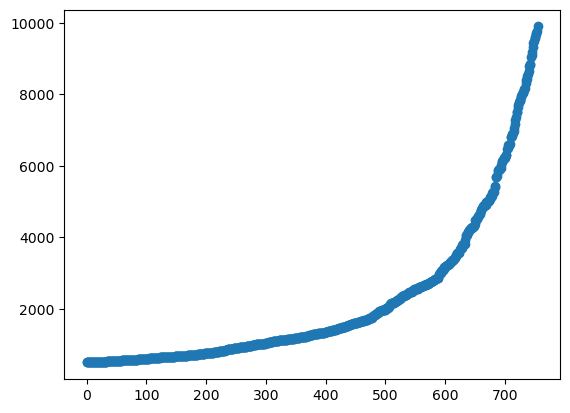

In [29]:
fig, ax = plt.subplots()

ax.scatter(range(len(plot_affectedonly)),plot_affectedonly)
ax.ticklabel_format(style='plain')

In [30]:
biggestbreaches = wa_databreach_df[wa_databreach_df['WashingtoniansAffected'] > 500000].sort_values(by='WashingtoniansAffected',ascending=False).reset_index().drop('index', axis=1)[['Name','WashingtoniansAffected']]
biggestbreaches['Number of Washingtonians Affected'] = biggestbreaches['WashingtoniansAffected']
biggestbreaches['Organization'] = biggestbreaches['Name']
biggestbreaches = biggestbreaches.drop(['WashingtoniansAffected', 'Name'], axis=1)
biggestbreaches = biggestbreaches[['Organization','Number of Washingtonians Affected']]
biggestbreaches

,Organization,Number of Washingtonians Affected
0,"Equifax, Inc.",3243664
1,T-Mobile USA,2079648
2,ACTIVEOutdoors,1449645
3,Washington State Auditor's Office,1420520
4,Boy Scouts of America,981068
5,"Neopets, Inc.",788415
6,T-Mobile USA,772593
7,Washington State University,769088
8,Sea Mar Community Health Centers,628569
9,CommonSpirit Health,582285


Note to self, make a function that will grab value counts from a given column.

maybe even take an argument that will choose the type of plot and plot it for you.

then save the image.

In [31]:
cybattcktype = wa_databreach_df['CyberattackType'].value_counts()
cybattcktype

Ransomware         282
Malware            185
Phishing            72
Other               64
Unreported          61
Skimmers            13
Unclear/unknown     11
Name: CyberattackType, dtype: int64

In [32]:
disinprog = wa_databreach_df['DiscoveredInProgress'].value_counts()
disinprog

False    590
True     377
Name: DiscoveredInProgress, dtype: int64

In [33]:
industype = wa_databreach_df['IndustryType'].value_counts()
industype

Business              454
Health                156
Finance               143
Non-Profit/Charity     97
Education              79
Government             38
Name: IndustryType, dtype: int64

In [34]:
bustype = wa_databreach_df['BusinessType'].value_counts()
bustype

Retail                   99
Other                    81
Hospitality              41
Professional Services    26
Manufacturing            25
Software                 22
Consumable               19
Clothing                 18
Legal                    16
Entertainment            15
Construction             13
Transportation           12
Human Resources           8
Telecommunications        8
Web Services              8
Accessories               8
Cosmetic                  8
Shipping                  7
Real Estate               6
Home                      6
Fitness                   6
Cleaning                  3
Cryptocurrency            2
Biotech                   1
Name: BusinessType, dtype: int64

In [35]:
datbreachcause = wa_databreach_df['DataBreachCause'].value_counts()
datbreachcause

Cyberattack            684
Unauthorized Access    212
Theft or Mistake        71
Name: DataBreachCause, dtype: int64

Text(0.5, 1.0, 'How often were attacks discovered while they were happening?')

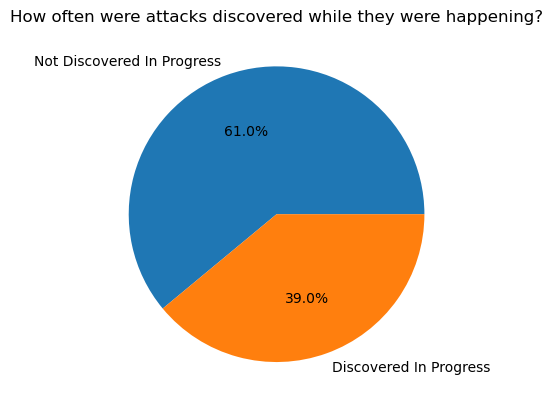

In [36]:
fig, ax = plt.subplots()

ax.pie(disinprog.values, labels=['Not Discovered In Progress','Discovered In Progress'], autopct='%1.1f%%')
ax.set_title('How often were attacks discovered while they were happening?')

Text(0.5, 1.0, 'Types of Cyber Attacks')

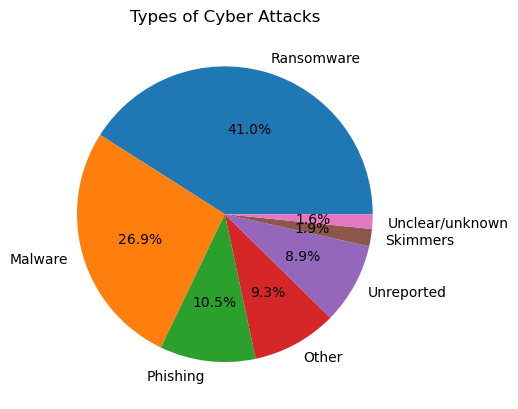

In [37]:
fig, ax = plt.subplots()

ax.pie(cybattcktype, labels=cybattcktype.index, autopct='%1.1f%%')

ax.set_title('Types of Cyber Attacks')

Text(0.5, 1.0, 'Industries Most Affected')

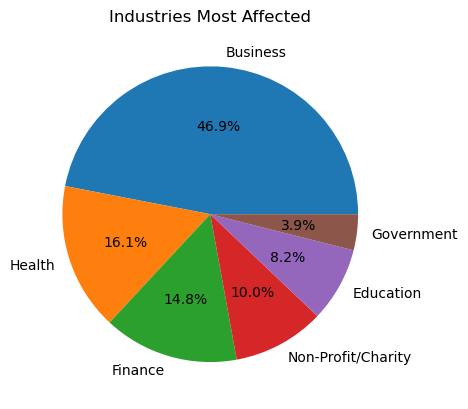

In [38]:
fig, ax = plt.subplots()

ax.pie(industype, labels=industype.index, autopct='%1.1f%%')

ax.set_title('Industries Most Affected')

Text(0.5, 1.0, 'Businesses Most Affected')

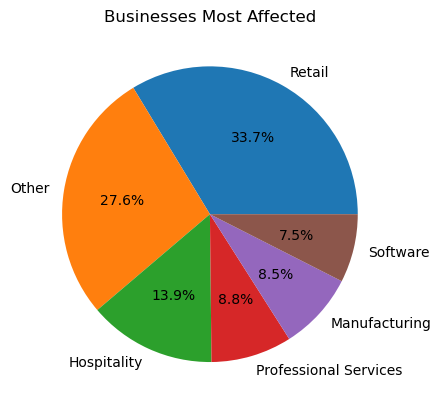

In [41]:
# Maybe try a bar for this one, or try resizing the labels and changing things around.

fig, ax = plt.subplots()

ax.pie(bustype[bustype > 20], labels=bustype[bustype > 20].index, autopct='%1.1f%%')

ax.set_title('Businesses Most Affected')

Text(0.5, 1.0, 'Data Breach Causes')

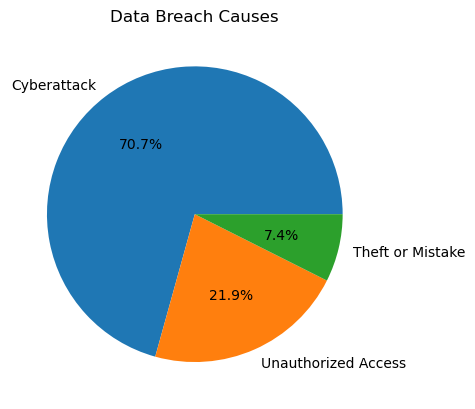

In [ ]:
fig, ax = plt.subplots()

ax.pie(datbreachcause, labels=datbreachcause.index, autopct='%1.1f%%')

ax.set_title('Data Breach Causes')

Figure out how to fix the x labels on this scatter plot...

Also, plot 2020-02-07 on its own and take a look at (what appears to be) a large coordinated ransomware attack.

In [ ]:
plotdates = wa_databreach_df.groupby('DateStart').count()
plotdates_notfebsev = plotdates[plotdates['Name'] < 108]

plotdates_notfebsev.index


Index([2008-04-01, 2010-08-25, 2011-12-01, 2013-06-01, 2013-10-23, 2013-11-15,
       2013-12-23, 2014-01-22, 2014-02-19, 2014-05-04,
       ...
       2023-04-25, 2023-05-27, 2023-05-28, 2023-05-29, 2023-05-30, 2023-05-31,
       2023-06-09, 2023-06-14, 2023-06-29, 2023-07-11],
      dtype='object', name='DateStart', length=570)

C:\Users\RGBMonster\AppData\Local\Temp\ipykernel_24964\1489270031.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65, fontsize=10)


[Text(13149.0, 0, '2006'),
 Text(13879.0, 0, '2008'),
 Text(14610.0, 0, '2010'),
 Text(15340.0, 0, '2012'),
 Text(16071.0, 0, '2014'),
 Text(16801.0, 0, '2016'),
 Text(17532.0, 0, '2018'),
 Text(18262.0, 0, '2020'),
 Text(18993.0, 0, '2022'),
 Text(19723.0, 0, '2024')]

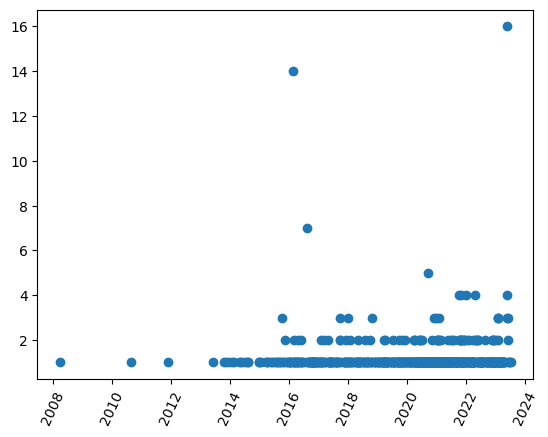

In [ ]:

fig,ax = plt.subplots()

ax.scatter(plotdates_notfebsev.index, plotdates_notfebsev['Name'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=65, fontsize=10)
# ax.set_xticklabels(rotation=65, fontsize=10)

In [ ]:
wa_databreach_df['DateStart'].value_counts()

type(plotdates_notfebsev.index[3])

datetime.date

In [ ]:
dtsv = dt.date(2020,2,7) # dtsv is date to search variable

onebigx = wa_databreach_df[wa_databreach_df['DateStart']==dtsv][['Name','CyberattackType', 'WashingtoniansAffected']].sort_values('WashingtoniansAffected', ascending=False).reset_index().drop('index', axis=1)
onebigx

sum(onebigx['WashingtoniansAffected'])

3460534.0

In [ ]:
plotdates_notfebsev

,DateAware,DateSubmitted,DataBreachCause,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,BusinessType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
DateStart,,,,,,,,,,,,,,,,,,,,,
2008-04-01,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
2010-08-25,1,1,1,0,1,1,1,1,1,0,...,1,0,1,0,1,0,0,1,1,1
2011-12-01,0,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,0,1,0,1
2013-06-01,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2013-10-23,1,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,2,2,2,2,2,2,1,2,2,0,...,2,2,2,2,2,2,2,2,2,2
2023-06-09,1,1,1,0,1,1,1,1,1,0,...,1,0,1,0,1,0,0,1,1,1
2023-06-14,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


In [ ]:
watonians_aff_notnull = wa_databreach_df[wa_databreach_df['WashingtoniansAffected'].notnull()]
watonians_aff_notnull_trimmed = watonians_aff_notnull[(watonians_aff_notnull['WashingtoniansAffected'] > 15) & (watonians_aff_notnull['WashingtoniansAffected'] < 10000)]
watonians_aff_notnull_trimmed

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,2017-09-26,10/12/2017 12:00:00 AM,"Best Buy Co, Inc.",9562,Malware,8390,Business,...,100-199,0,183,183,False,16,167,False,16,1-99
2,03/14/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Unauthorized Access,NaT,NaN,Inogen Inc.,9563,NaN,518,Health,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,30,Unknown
3,03/15/2018 12:00:00 AM,04/24/2018 12:00:00 AM,Cyberattack,2017-09-27,10/12/2017 12:00:00 AM,Sears Holdings,9565,Malware,2373,Business,...,100-199,0,169,169,False,15,154,False,40,1-99
5,02/16/2018 12:00:00 AM,04/30/2018 12:00:00 AM,Cyberattack,2017-11-29,02/16/2018 12:00:00 AM,Rail Europe North America,9567,Unreported,687,Business,...,1-99,0,79,79,True,79,NaN,True,73,1-99
6,03/19/2018 12:00:00 AM,05/03/2018 12:00:00 AM,Cyberattack,2017-10-01,12/22/2017 12:00:00 AM,Alaska Airlines,9569,Unreported,1442,Business,...,100-199,0,169,169,False,82,87,False,45,1-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,05/31/2023 12:00:00 AM,08/14/2023 12:00:00 AM,Unauthorized Access,2023-05-29,05/30/2023 12:00:00 AM,"Milliman, Inc.",15644,NaN,2337,Business,...,1-99,0,2,2,False,1,1,False,75,1-99
941,06/09/2023 12:00:00 AM,09/25/2023 12:00:00 AM,Cyberattack,2023-06-09,NaN,Spinal and Sports Care Clinic,15676,Ransomware,1089,Health,...,Unknown,NaN,0,NaN,False,NaN,NaN,False,108,Unknown
942,06/04/2023 12:00:00 AM,09/25/2023 12:00:00 AM,Unauthorized Access,NaT,NaN,Data Media Associates,15677,NaN,657,Business,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,113,Unknown
943,05/31/2023 12:00:00 AM,09/22/2023 12:00:00 AM,Cyberattack,2023-05-30,05/31/2023 12:00:00 AM,Financial Institution Service Corporation,15681,Other,2140,Finance,...,1-99,0,1,1,True,1,NaN,True,114,1-99


<Axes: >

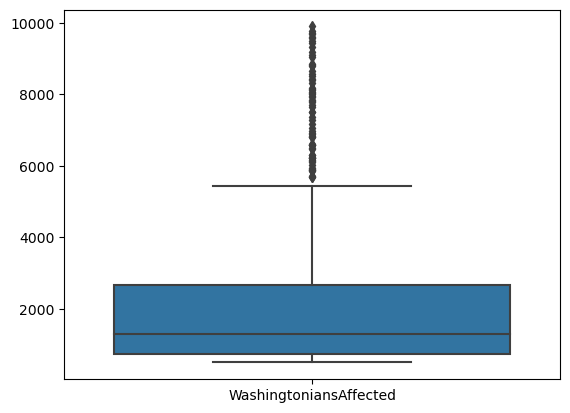

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(watonians_aff_notnull_trimmed.loc[:, ['WashingtoniansAffected']])

<Axes: >

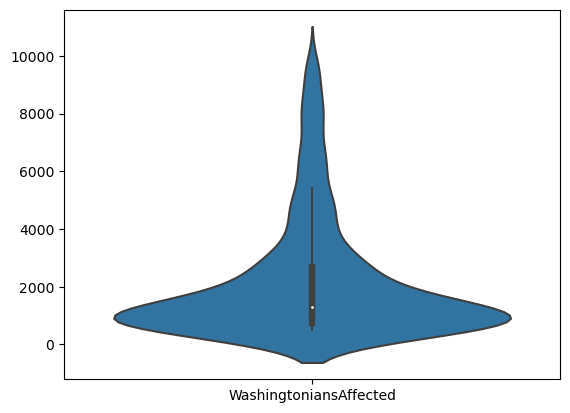

In [ ]:
fig, ax = plt.subplots()

sns.violinplot(watonians_aff_notnull_trimmed.loc[:, ['WashingtoniansAffected']])

<Axes: >

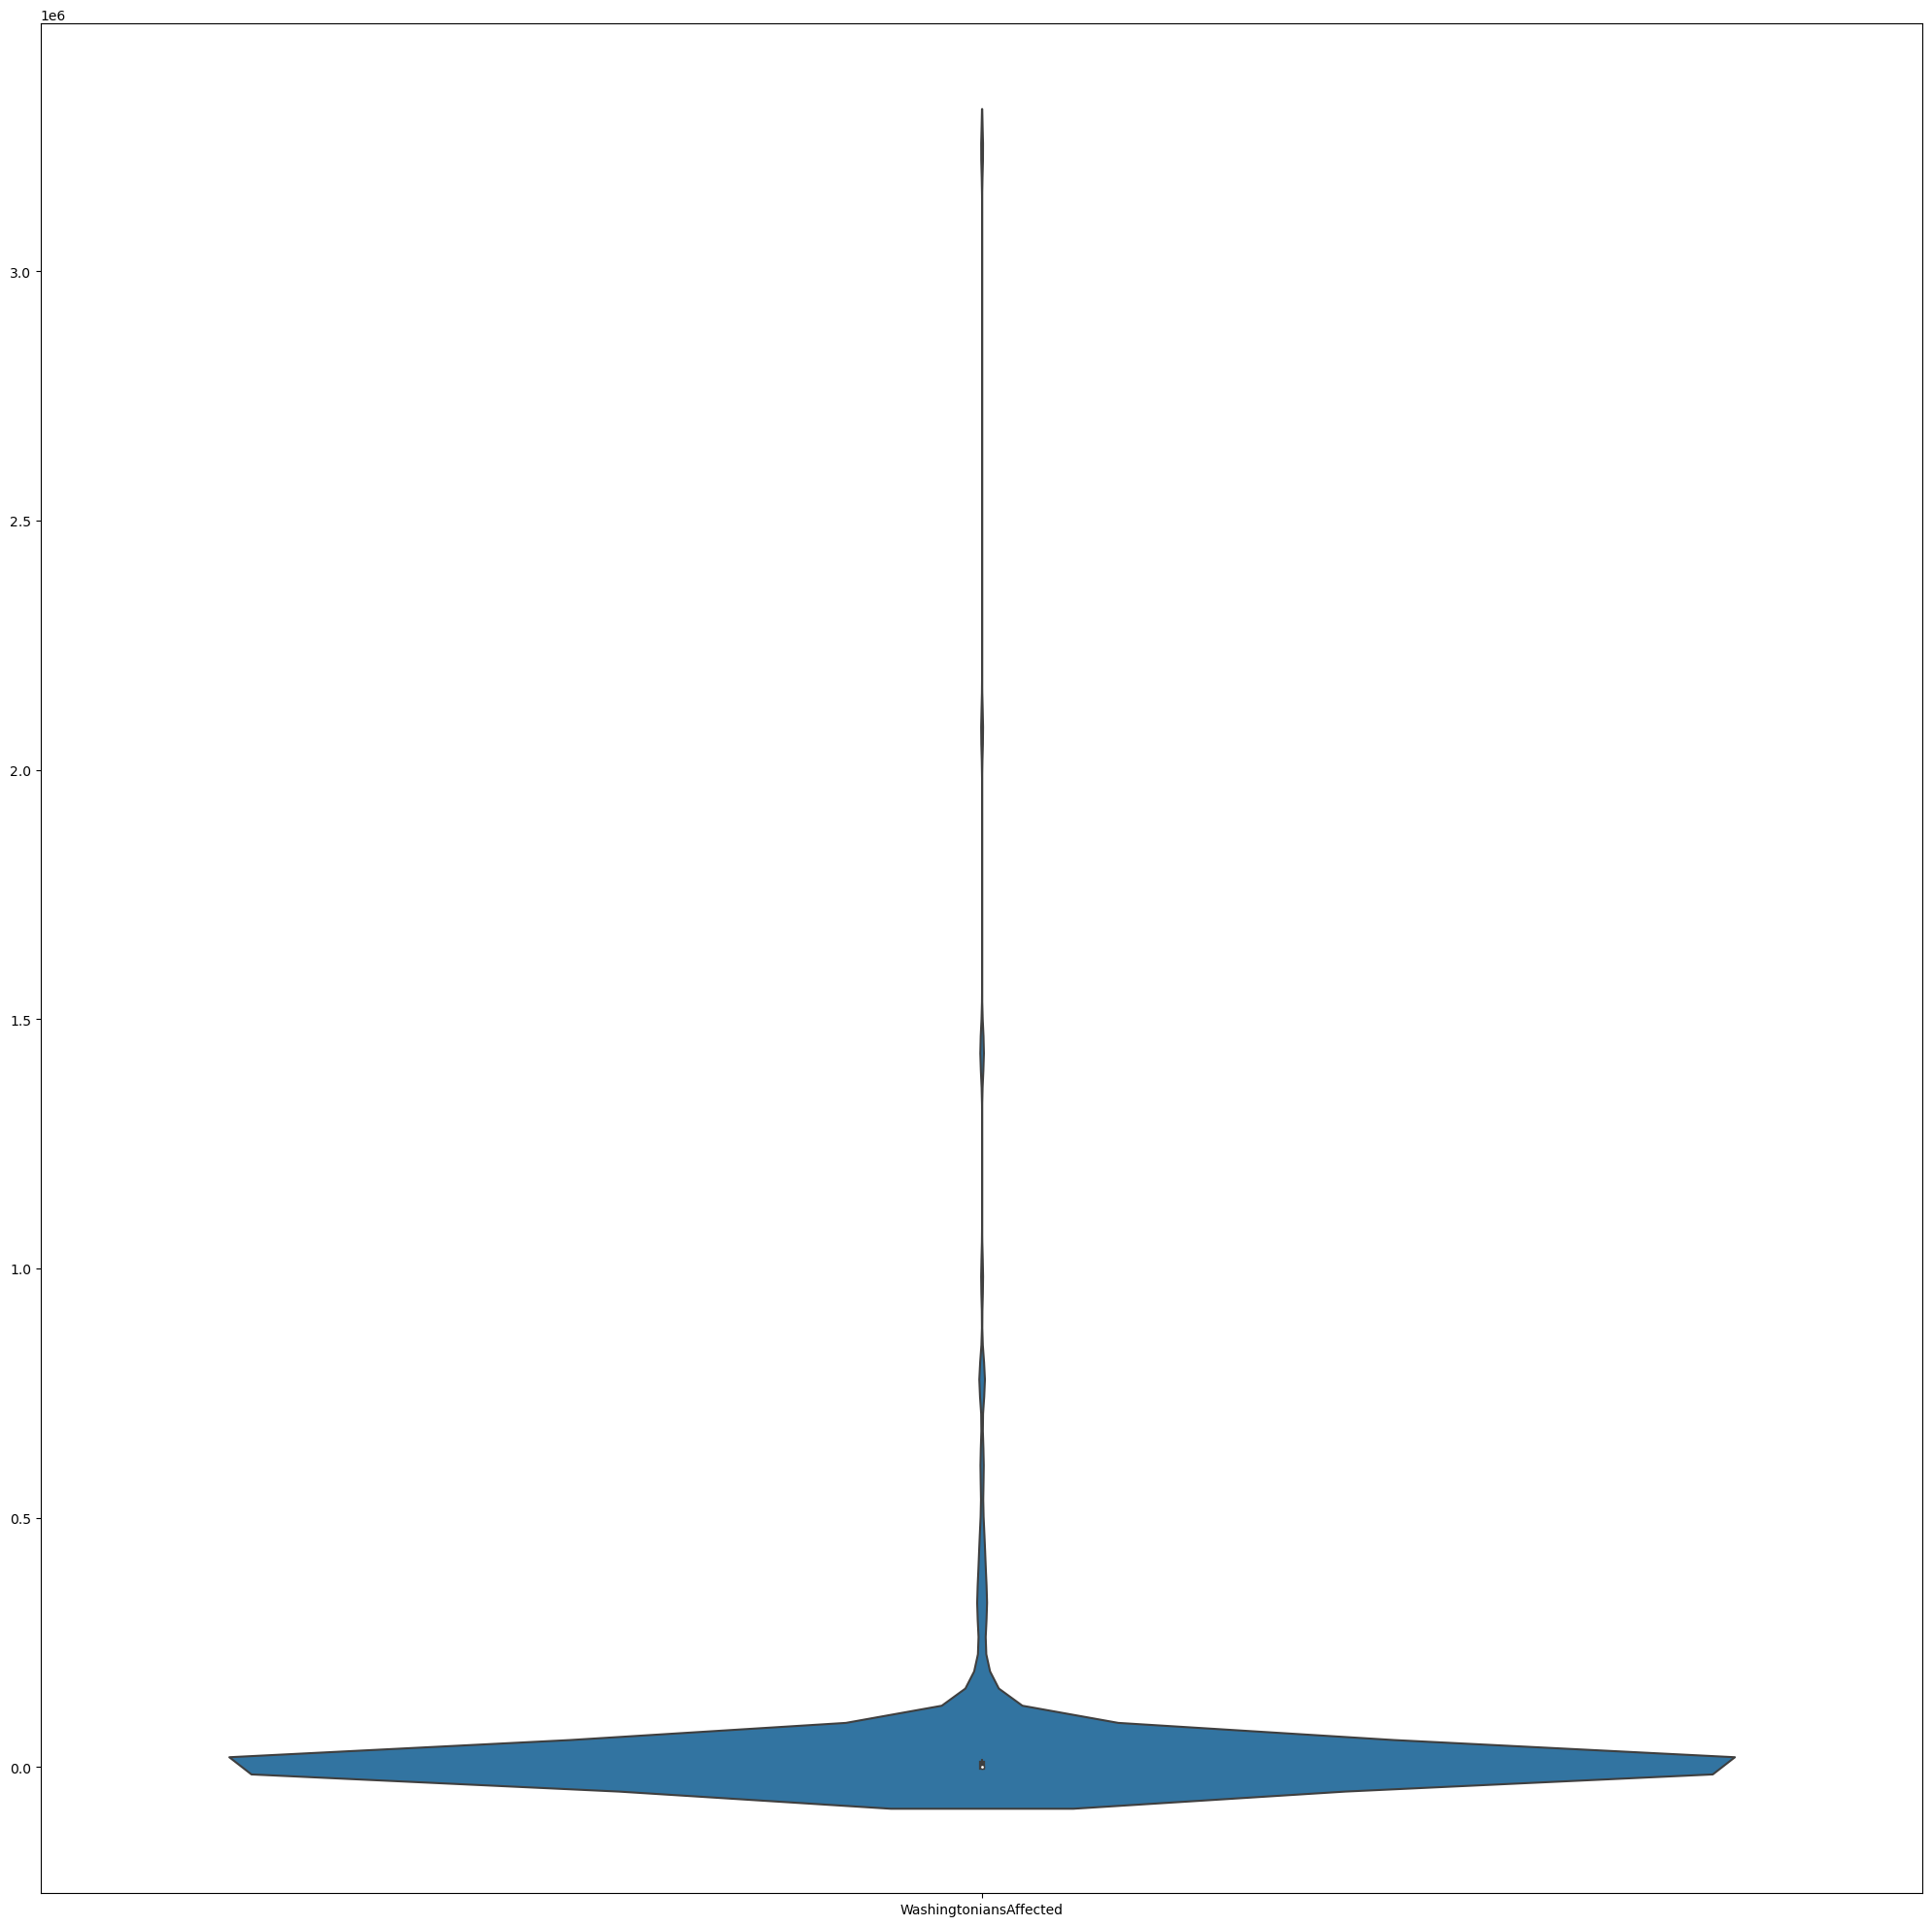

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))

sns.violinplot(wa_databreach_df.loc[:, ['WashingtoniansAffected']])